In [166]:
import sys
print(sys.executable)

C:\Users\neele\AppData\Local\Programs\Python\Python312\python.exe


In [167]:
import numpy
print(numpy.__file__)

C:\Users\neele\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\__init__.py


In [168]:
import numpy as np
import pandas as pd 

In [169]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [170]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2196,ham,"Not much, just some textin'. How bout you?",NaN,NaN,NaN
3829,ham,I agree. So i can stop thinkin about ipad. Can...,NaN,NaN,NaN
4322,ham,Aight well keep me informed,NaN,NaN,NaN
4662,ham,No. Yes please. Been swimming?,NaN,NaN,NaN
3684,ham,Wake me up at &lt;#&gt; am morning:),NaN,NaN,NaN


In [171]:
df.size

27860

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [173]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [174]:
df.sample(5)

,v1,v2
4389,ham,Do you know why god created gap between your f...
2670,ham,Yes. They replied my mail. I'm going to the ma...
2019,ham,From tomorrow onwards eve 6 to 3 work.
3309,ham,Oh ho. Is this the first time u use these type...
898,ham,"Thursday night? Yeah, sure thing, we'll work i..."


In [204]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text,num_characters,num_words,num_sentences
3643,0,* Thought I didn't see you.,27,1,1
2740,0,Nothing. Can...,15,2,2
1578,0,How to Make a girl Happy? It's not at all diff...,611,38,38
1467,0,I wont touch you with out your permission.,42,1,1
4342,0,Its a valentine game. . . send dis msg to all ...,150,7,7


In [205]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [206]:
df['target'] = encoder.fit_transform(df['target'])

In [207]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,2,2
1,0,Ok lar... Joking wif u oni...,29,2,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,2
3,0,U dun say so early hor... U c already then say...,49,1,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,1


In [208]:
#missing values
df.isnull().sum()

target            0
text              0
num_characters    0
num_words         0
num_sentences     0
dtype: int64

In [209]:
df.duplicated().sum()

0

In [210]:
df.drop_duplicates(keep='first', inplace=True)

In [211]:
df.duplicated().sum()

0

In [212]:
df.shape

(5169, 5)

In [213]:
#EDA(exploratary data analysis)
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,2,2
1,0,Ok lar... Joking wif u oni...,29,2,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,2
3,0,U dun say so early hor... U c already then say...,49,1,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,1


In [214]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

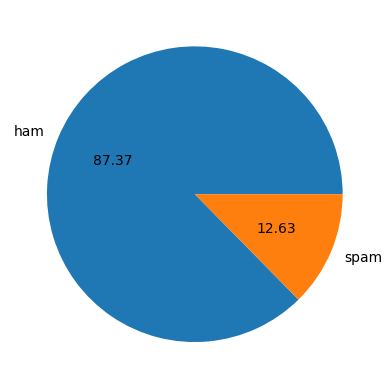

In [215]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [216]:
#data is imbalanced

In [217]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\neele\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [218]:
df['num_characters'] = df['text'].apply(len)#getting the number of characters

In [219]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,2,2
1,0,Ok lar... Joking wif u oni...,29,2,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,2
3,0,U dun say so early hor... U c already then say...,49,1,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,1


In [220]:
#num of words
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [221]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [222]:
df['num_sentences'] = df['num_words'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [223]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,2,2
1,0,Ok lar... Joking wif u oni...,29,2,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,2
3,0,U dun say so early hor... U c already then say...,49,1,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,1


In [224]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,1.965564,1.965564
std,58.236293,1.448541,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,1.000000,1.000000
50%,60.000000,1.000000,1.000000
75%,117.000000,2.000000,2.000000
max,910.000000,38.000000,38.000000


In [225]:
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()#ham

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,1.820195,1.820195
std,56.358207,1.383657,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,1.000000,1.000000
50%,52.000000,1.000000,1.000000
75%,90.000000,2.000000,2.000000
max,910.000000,38.000000,38.000000


In [226]:
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()#spam

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,2.970904,2.970904
std,30.137753,1.488425,1.488425
min,13.000000,1.000000,1.000000
25%,132.000000,2.000000,2.000000
50%,149.000000,3.000000,3.000000
75%,157.000000,4.000000,4.000000
max,224.000000,9.000000,9.000000


In [227]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

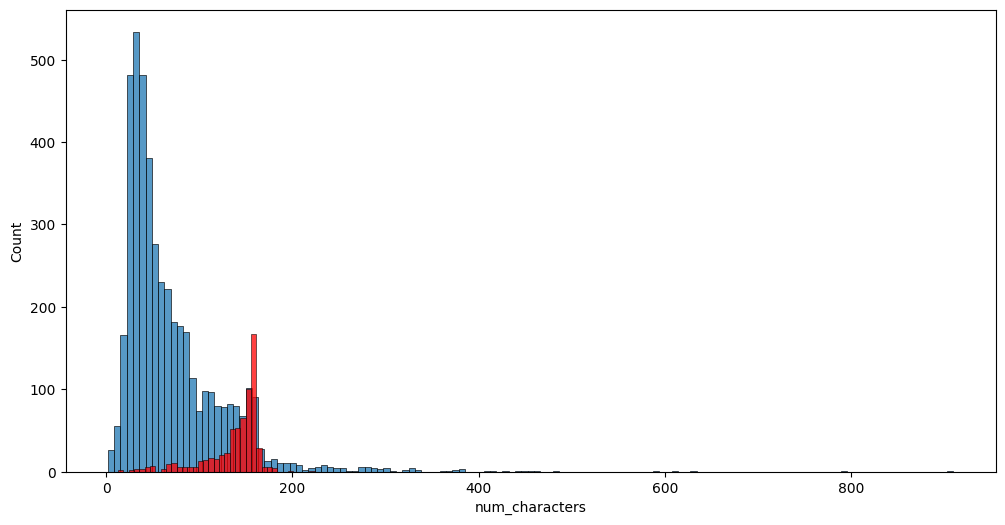

In [228]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']== 0]['num_characters'])#spam message character used
sns.histplot(df[df['target']== 1]['num_characters'] , color ='red')#ham messages character used 

<Axes: xlabel='num_words', ylabel='Count'>

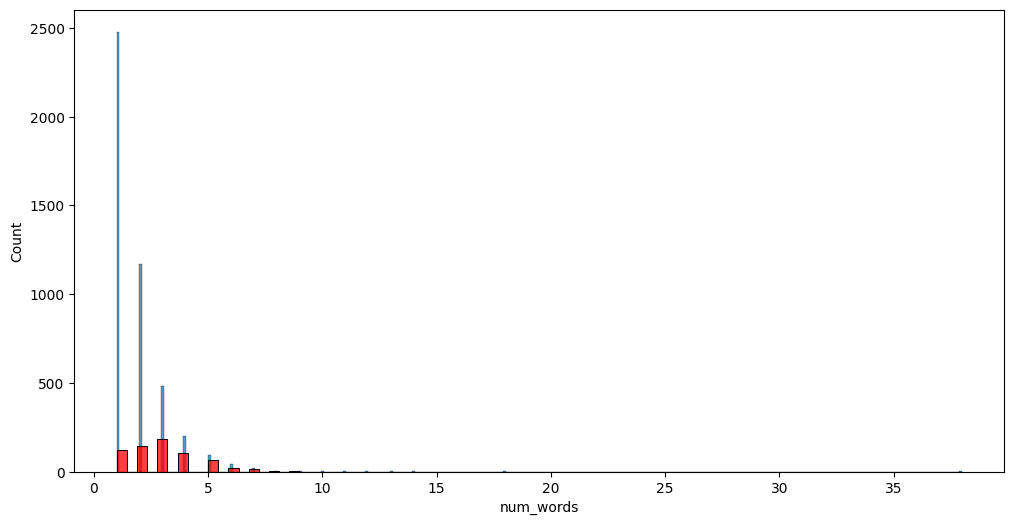

In [229]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']== 0]['num_words'])
sns.histplot(df[df['target']== 1]['num_words'] , color ='red')

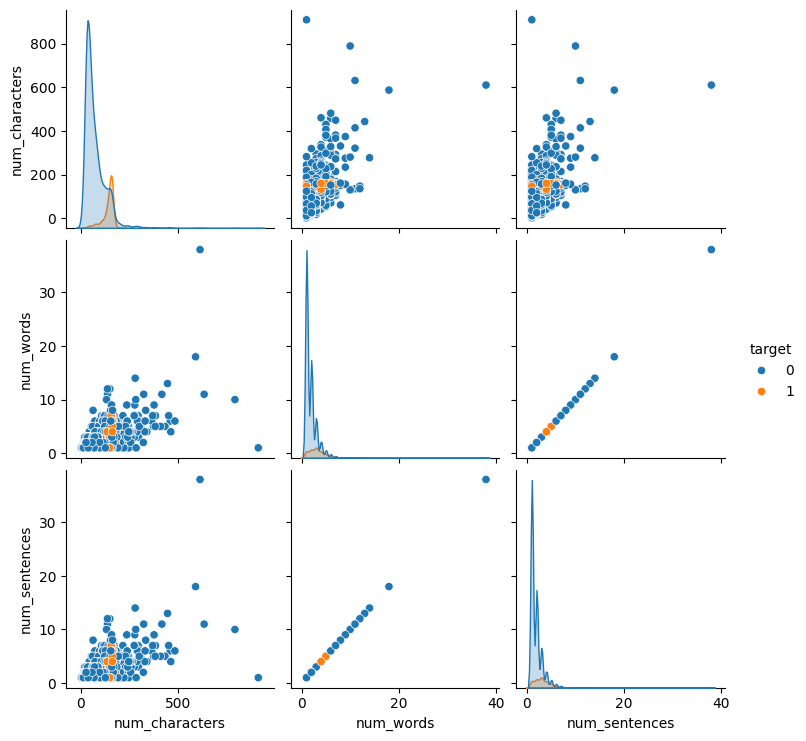

In [230]:
sns.pairplot(df,hue='target')

<Axes: >

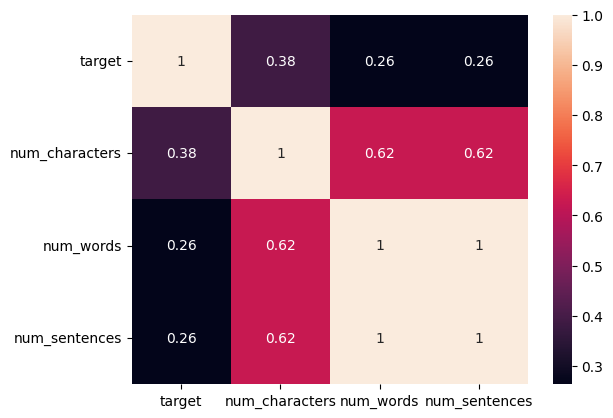

In [231]:
numerical_df = df.select_dtypes(include=[np.number])
sns.heatmap(numerical_df.corr(), annot=True)

<Axes: >

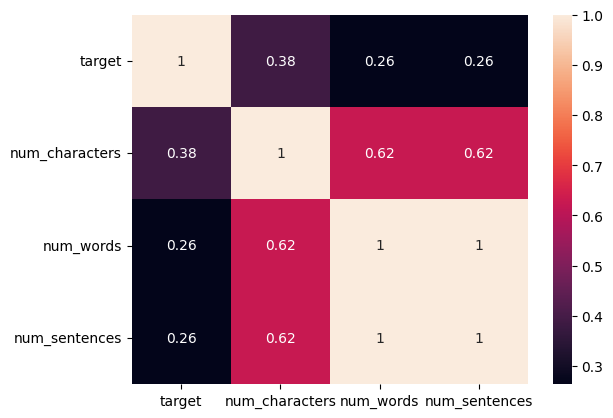

In [232]:
numerical_df = df.select_dtypes(include=[np.number])
sns.heatmap(numerical_df.corr(), annot=True)

In [233]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\neele\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [234]:
from nltk.corpus import stopwords

In [235]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y= []
    for i in text: 
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text :
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [236]:
import string

In [237]:
transform_text('I loved dancing on the day of my farewell ? ')

'love danc day farewel'

In [238]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [239]:
from nltk.corpus import stopwords

In [240]:
df['text'] = df['text'].apply(transform_text)

In [241]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,go jurong point crazi avail bugi n great world...,111,2,2
1,0,ok lar joke wif u oni,29,2,2
2,1,free entri 2 wkli comp win fa cup final tkt 21...,155,2,2
3,0,u dun say earli hor u c alreadi say,49,1,1
4,0,nah think goe usf live around though,61,1,1


In [242]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [243]:
!pip install wordcloud



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [244]:
df['transformed_text'] = df['text'].apply(transform_text)

In [245]:
 spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

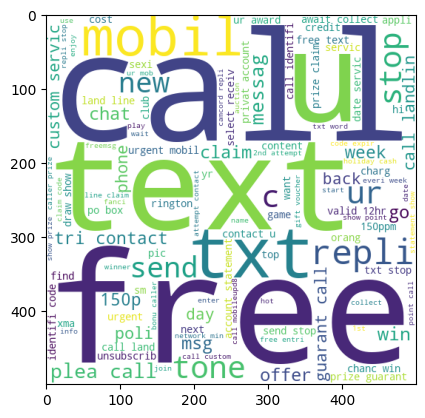

In [246]:
plt.imshow(spam_wc)#spam message text 

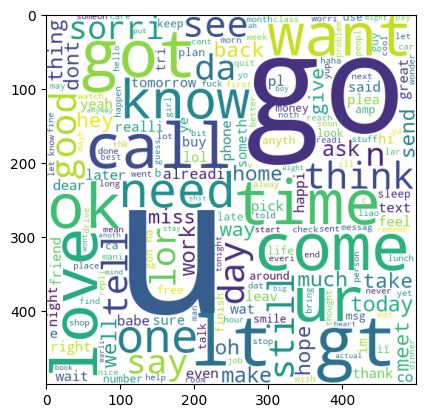

In [247]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)#ham message text 

In [248]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,go jurong point crazi avail bugi n great world...,111,2,2,go jurong point crazi avail bugi n great world...
1,0,ok lar joke wif u oni,29,2,2,ok lar joke wif u oni
2,1,free entri 2 wkli comp win fa cup final tkt 21...,155,2,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,u dun say earli hor u c alreadi say,49,1,1,u dun say earli hor u c alreadi say
4,0,nah think goe usf live around though,61,1,1,nah think goe usf live around though


In [249]:
df['transform_text'] = df['text'].apply(transform_text)

In [250]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [251]:
len(spam_corpus)

9930

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29')])

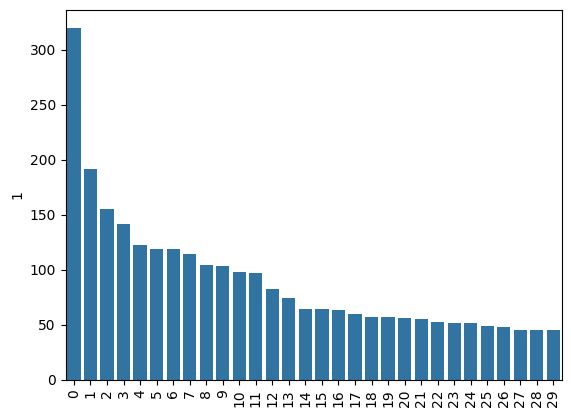

In [252]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')

In [253]:
ham_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [254]:
len(ham_corpus)

9930

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29')])

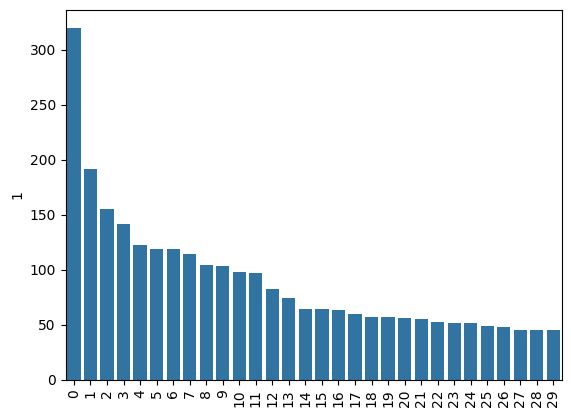

In [255]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')

In [256]:
#MODEL BUILDING 
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [257]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [258]:
X.shape

(5169, 3000)

In [259]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [260]:
y = df['target'].values

In [261]:
from sklearn.model_selection import train_test_split

In [262]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [263]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [264]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [265]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8733075435203095
[[783 113]
 [ 18 120]]
0.5150214592274678


In [266]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9777562862669246
[[889   7]
 [ 16 122]]
0.9457364341085271


In [267]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [268]:
#we have chose tfidf->> MNB

In [269]:
#model improvisitaion

In [270]:
import pickle 
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))